# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import normalize
import requests
import docx
from bs4 import BeautifulSoup

# Sample Text

#### From Hugging Face

In [2]:
splits = {'train': 'train.parquet', 'validation': 'validation.parquet', 'test': 'test.parquet'}
df1 = pd.read_parquet("hf://datasets/cornell-movie-review-data/rotten_tomatoes/" + splits["train"])
df2 = pd.read_parquet("hf://datasets/cornell-movie-review-data/rotten_tomatoes/" + splits["validation"])
df3 = pd.read_parquet("hf://datasets/cornell-movie-review-data/rotten_tomatoes/" + splits["test"])
df0 = pd.concat([df1, df2, df3])
for df in [df0, df1, df2, df3]:
  df.drop('label',axis=1,inplace=True)
df0.head()


,text
0,the rock is destined to be the 21st century's ...
1,"the gorgeously elaborate continuation of "" the..."
2,effective but too-tepid biopic
3,if you sometimes like to go to the movies to h...
4,"emerges as something rare , an issue movie tha..."


In [3]:
for df in [df0,df1,df2,df3]:
  print(df.shape)

(10662, 1)
(8530, 1)
(1066, 1)
(1066, 1)


In [4]:
reviews = []
for df in [df1,df2,df3,df0]:
  review = df['text'].tolist()
  reviews.append(review)
print(len(reviews))

4


#### Web scraping to include blogs, articles and a story generated using Grok.

In [5]:
def scrapeParagraphsFromWebsite(url):
  try:
    print(url)
    if url.endswith(".docx"):
      response = requests.get(url.replace("/blob/", "/raw/"))  # Get raw content
      response.raise_for_status()
      with open("temp.docx", "wb") as f:
        f.write(response.content)
      doc = docx.Document("temp.docx")
      textCorpus = [paragraph.text for paragraph in doc.paragraphs]
      text_corpus_string = " ".join(textCorpus)
      print(text_corpus_string[:10])
    else:
      response = requests.get(url)
      response.raise_for_status()
      soup = BeautifulSoup(response.content, "html.parser")
      paragraphs = soup.find_all("p")
      # Collect text of paragraphs into a list
      textCorpus = []
      for paragraph in paragraphs:
        textCorpus.append(paragraph.text)
      # Join all paragraph texts into one string
      text_corpus_string = " ".join(textCorpus)
    print(text_corpus_string[-10:])
    return text_corpus_string

  except requests.RequestException as e:
      print(f"Request failed: {e}")
      return None
  except Exception as e:
      print(f"An error occurred: {e}")
      return None

urls = ["https://www.npr.org/2022/04/10/1089652445/museums-turn-to-immersive-tech-to-preserve-the-stories-of-aging-holocaust-surviv","https://ia.samaltman.com/","https://blog.samaltman.com/reflections","https://www.theguardian.com/commentisfree/2024/dec/18/lesbian-mothers-scandal-custody-cases-families","https://www.nytimes.com/wirecutter/reviews/hide-wifi-router-maintain-signal/?campaign_id=290&emc=edit_wcd_20250127&instance_id=145906&nl=the-recommendation&regi_id=228774333&segment_id=189426&user_id=190509cfe7a0a183c26b1d1dd1d21fc6","https://github.com/jeet1912/ms/blob/main/cs634/presentation/story.docx"]
textCorpora = []
for eachURL in urls:
  textCorpus = scrapeParagraphsFromWebsite(eachURL)
  textCorpora.append(textCorpus)

https://www.npr.org/2022/04/10/1089652445/museums-turn-to-immersive-tech-to-preserve-the-stories-of-aging-holocaust-surviv
PR sponsor
https://ia.samaltman.com/
maginable.
https://blog.samaltman.com/reflections
r partner.
https://www.theguardian.com/commentisfree/2024/dec/18/lesbian-mothers-scandal-custody-cases-families
 sexuality
https://www.nytimes.com/wirecutter/reviews/hide-wifi-router-maintain-signal/?campaign_id=290&emc=edit_wcd_20250127&instance_id=145906&nl=the-recommendation&regi_id=228774333&segment_id=189426&user_id=190509cfe7a0a183c26b1d1dd1d21fc6
st time). 
https://github.com/jeet1912/ms/blob/main/cs634/presentation/story.docx
In a socie
          


In [6]:
print(len(textCorpora))

6


In [7]:
print(textCorpora[5])

In a society where time is the essence of life, every watch and clock ticks with perfect precision. Residents here wake up knowing exactly when the sun will crest the horizon, not a moment too soon or too late. This world has mastered timekeeping, turning it into an art form. Each morning, the chirping of birds aligns with the first rays of light, as if nature itself is synchronized to this rhythm. People live in harmony with life's cadence, guided by their watches. The streets buzz with early risers, all moving in unison, their steps in tune with the city's heartbeat. Schools open at precisely 8:00 AM, with children arriving to the second. Workplaces are alive with activity, where every meeting and deadline is met without fail. Markets thrive on this precision, with vendors setting up at the crack of dawn. Even public transport, from buses to trains, operates on a schedule so reliable it could be set by the stars. To live here means knowing peace in timing. No one rushes; they know ex

#### Appending Hugging Face and Scrapped Texts

In [8]:
for review in reviews:
  textCorpora.append(review)
print(len(textCorpora))

10


In [9]:
for textCorpus in textCorpora:
  print(len(textCorpus))

7391
6347
10793
6774
7583
107784
8530
1066
1066
10662


# Char To ASCII

In [10]:
def charToASCII(text):
  """Converts each character in a string to its ASCII value.

  Args:
    text: The input string.

  Returns:
    A list of ASCII values for each character in the string.
  """
  # Check if text is a string
  if isinstance(text, str):
      return [ord(char) for char in text]
  # If text is a list of strings, process each string individually
  elif isinstance(text, list):
      return [[ord(char) for char in sub_text] for sub_text in text]
  else:
      raise TypeError("Input must be a string or a list of strings.")


def processTextCorpuses(textCorpora):
    asciiText = []
    all_text = ""

    for i, textCorpus in enumerate(textCorpora):
        print(f"This is {i}")
        print(f"Length of corpus: {len(textCorpus)}")
        print(f"First 10 characters of corpus: {textCorpus[:10]}")

        # Check if textCorpus is a list and join it if necessary
        if isinstance(textCorpus, list):
            textCorpus = ' '.join(textCorpus)

        # Convert corpus to ASCII, including all characters
        ascii_corpus = charToASCII(textCorpus)
        asciiText.append(ascii_corpus)

        # Print the first 10 ASCII values of the current corpus for verification
        print(f"First 10 ASCII values of corpus: {ascii_corpus[:10]}")
        print(f"Number of ASCII lists in asciiText: {len(asciiText)}")

        # Append to the all_text for the final combined ASCII conversion
        all_text += textCorpus

    # Append the combined ASCII representation of all corpora
    asciiText.append(charToASCII(all_text))
    print(f"Final length of asciiText: {len(asciiText)}")
    print(f"Length of combined ASCII list: {len(asciiText[-1])}")

    return asciiText

# Assuming textCorpuses is your list of text corpora
# Example:
# textCorpuses = ["First corpus\nwith newline", "Second\tcorpus with tab", ...]
asciiText = processTextCorpuses(textCorpora)
print(len(asciiText))

This is 0
Length of corpus: 7391
First 10 characters of corpus: 

      Ne
First 10 ASCII values of corpus: [10, 10, 32, 32, 32, 32, 32, 32, 78, 101]
Number of ASCII lists in asciiText: 1
This is 1
Length of corpus: 6347
First 10 characters of corpus: In the nex
First 10 ASCII values of corpus: [73, 110, 32, 116, 104, 101, 32, 110, 101, 120]
Number of ASCII lists in asciiText: 2
This is 2
Length of corpus: 10793
First 10 characters of corpus: The second
First 10 ASCII values of corpus: [84, 104, 101, 32, 115, 101, 99, 111, 110, 100]
Number of ASCII lists in asciiText: 3
This is 3
Length of corpus: 6774
First 10 characters of corpus: As late as
First 10 ASCII values of corpus: [65, 115, 32, 108, 97, 116, 101, 32, 97, 115]
Number of ASCII lists in asciiText: 4
This is 4
Length of corpus: 7583
First 10 characters of corpus: Advertisem
First 10 ASCII values of corpus: [65, 100, 118, 101, 114, 116, 105, 115, 101, 109]
Number of ASCII lists in asciiText: 5
This is 5
Length of corpus: 107784


# Dataframe of Sentences in ASCII

In [11]:
def createASCIISentences(ascii_text, dropPeriods=False):
    """Splits an array of ASCII codes by the 'period' character, creates a DataFrame
    with sentences including periods, and adds an ASCII representation column. Uses ASCII code for periods.

    Args:
        ascii_text: A list of ASCII codes.
        dropPeriods: Boolean to determine if periods should be included in sentences.

    Returns:
        A Pandas DataFrame with columns 'Sentences' and 'ASCII Representation'.
    """
    # ASCII code for period ('.') is 46
    sentences = []
    current_sentence = []
    for code in ascii_text:
        if code == 46 and not dropPeriods:  # If we encounter a period and we're not dropping them
            current_sentence.append(code)
            sentences.append(current_sentence[:])  # Append a copy of current_sentence
            current_sentence = []  # Reset for the next sentence
        elif code == 46 and dropPeriods:  # If we're dropping periods at the end of sentences
            sentences.append(current_sentence[:])
            current_sentence = []
        else:
            current_sentence.append(code)

    # Handle any remaining characters if the text doesn't end with a period
    if current_sentence:
        sentences.append(current_sentence)

    # Convert ASCII codes back to sentences for display, but keep original ASCII for representation
    data = []
    for sentence in sentences:
        if not dropPeriods and sentence and sentence[-1] == 46:
            sentence_text = ''.join(chr(c) for c in sentence)
        else:
            sentence_text = ''.join(chr(c) for c in sentence) + ('' if dropPeriods else '.')
        data.append({
            'Sentences': sentence_text,
            'ASCII Representation': sentence
        })

    return pd.DataFrame(data)

# Assuming 'asciiText' is a list of ASCII representations for each corpus
# Note: We'll ignore the last element of asciiText which was the combined corpus
listOfDataframes = []
for i, ascii_corpus in enumerate(asciiText[:]):
    df = createASCIISentences(ascii_corpus)
    listOfDataframes.append(df)
    print(f"DataFrame for Corpus {i}:")
    print(df.head())  # Print the first few rows of each DataFrame
    print()

# Now 'listOfDataframes' contains a DataFrame for each corpus

DataFrame for Corpus 0:
                                           Sentences  \
0  \n\n      Neda Ulaby\n    \n \n               ...   
1  \n                \n                    \n    ...   
2   Most Holocaust survivors are in their 80s or ...   
3   With every year, fewer remain to tell us thei...   
4   So museums and archives are using advanced te...   

                                ASCII Representation  
0  [10, 10, 32, 32, 32, 32, 32, 32, 78, 101, 100,...  
1  [10, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 3...  
2  [32, 77, 111, 115, 116, 32, 72, 111, 108, 111,...  
3  [32, 87, 105, 116, 104, 32, 101, 118, 101, 114...  
4  [32, 83, 111, 32, 109, 117, 115, 101, 117, 109...  

DataFrame for Corpus 1:
                                           Sentences  \
0  In the next couple of decades, we will be able...   
1   This phenomenon is not new, but it will be ne...   
2   People have become dramatically more capable ...   
3   We are more capable not because of genetic ch...   
4   

In [12]:
for df in listOfDataframes:
  print(df.shape)

(54, 2)
(43, 2)
(96, 2)
(50, 2)
(60, 2)
(1007, 2)
(11197, 2)
(1402, 2)
(1411, 2)
(14010, 2)
(29326, 2)


In [13]:
for i, df in enumerate(listOfDataframes):
    print(f"Shape of DataFrame {i}: {df.shape}")
    print(f"Head of 'ASCII Representation' column in DataFrame {i}:")
    print(df['ASCII Representation'].head())
    print()

Shape of DataFrame 0: (54, 2)
Head of 'ASCII Representation' column in DataFrame 0:
0    [10, 10, 32, 32, 32, 32, 32, 32, 78, 101, 100,...
1    [10, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 3...
2    [32, 77, 111, 115, 116, 32, 72, 111, 108, 111,...
3    [32, 87, 105, 116, 104, 32, 101, 118, 101, 114...
4    [32, 83, 111, 32, 109, 117, 115, 101, 117, 109...
Name: ASCII Representation, dtype: object

Shape of DataFrame 1: (43, 2)
Head of 'ASCII Representation' column in DataFrame 1:
0    [73, 110, 32, 116, 104, 101, 32, 110, 101, 120...
1    [32, 84, 104, 105, 115, 32, 112, 104, 101, 110...
2    [32, 80, 101, 111, 112, 108, 101, 32, 104, 97,...
3    [32, 87, 101, 32, 97, 114, 101, 32, 109, 111, ...
4    [32, 79, 117, 114, 32, 103, 114, 97, 110, 100,...
Name: ASCII Representation, dtype: object

Shape of DataFrame 2: (96, 2)
Head of 'ASCII Representation' column in DataFrame 2:
0    [84, 104, 101, 32, 115, 101, 99, 111, 110, 100...
1    [32, 78, 101, 119, 32, 121, 101, 97, 114, 115,...
2 

325


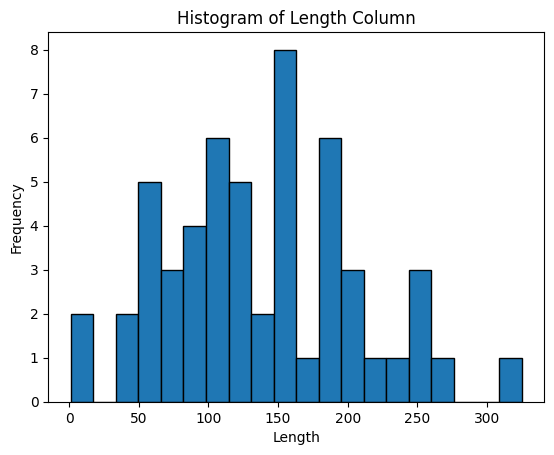


399


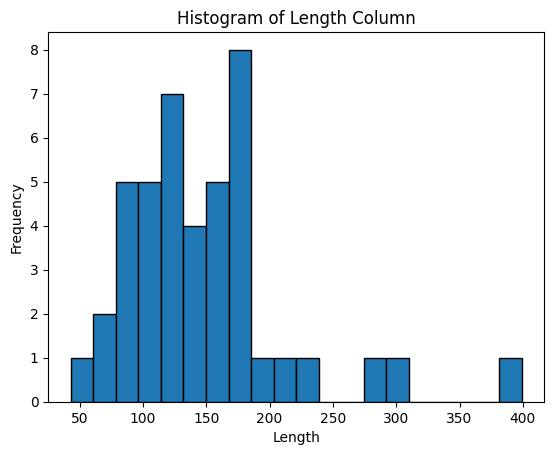


415


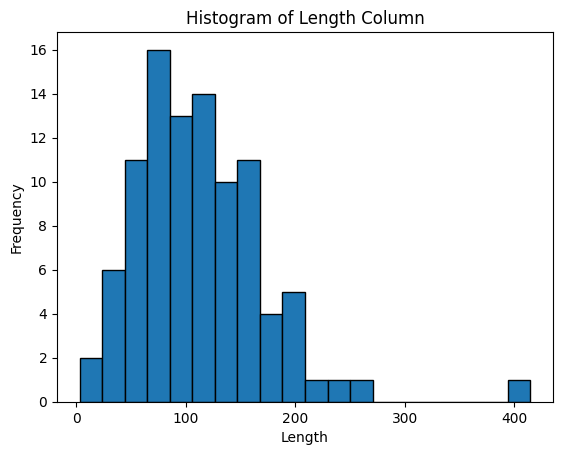


294


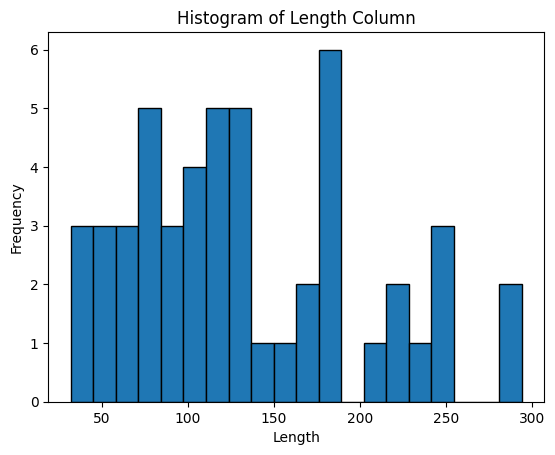


334


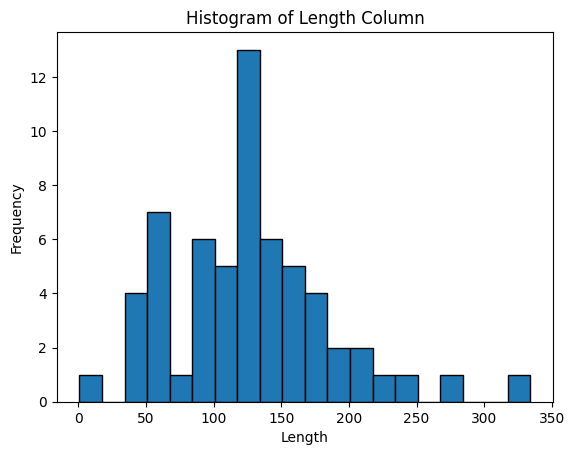


176


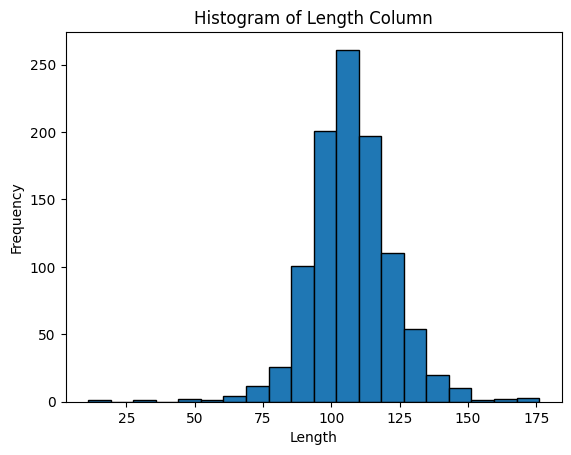


446


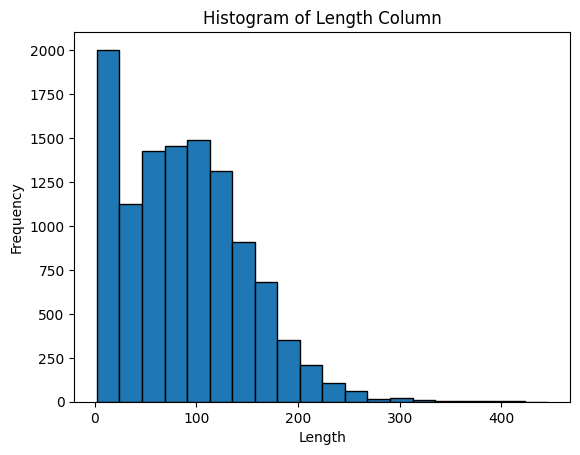


396


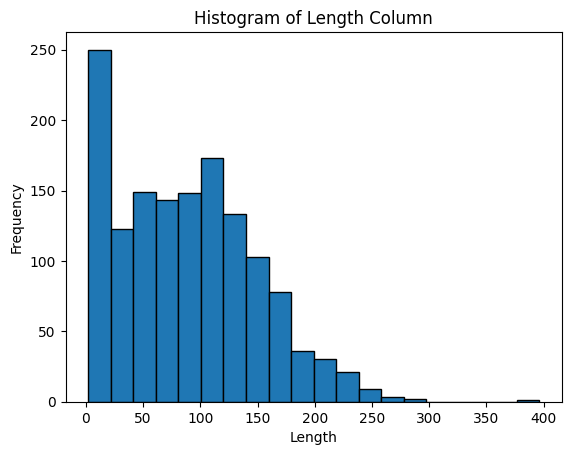


394


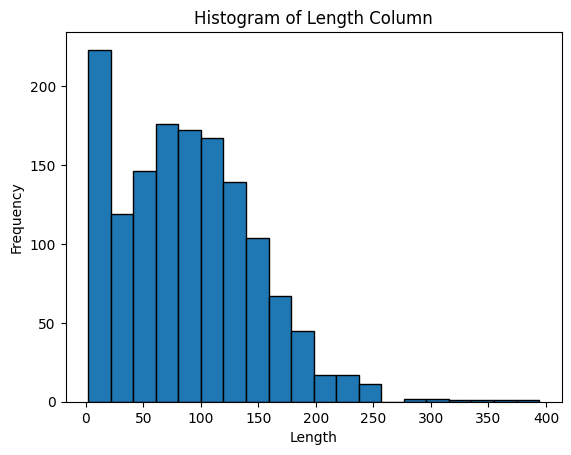


446


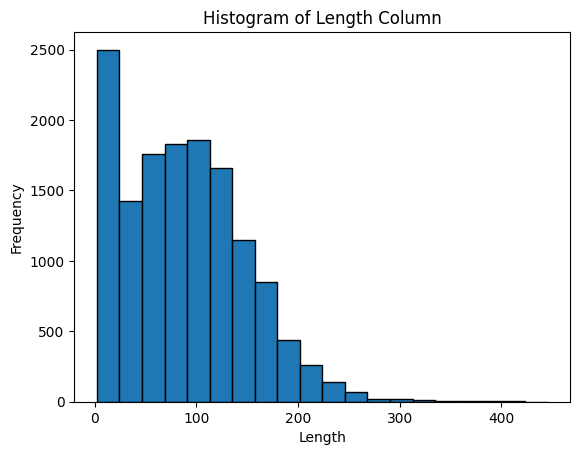


446


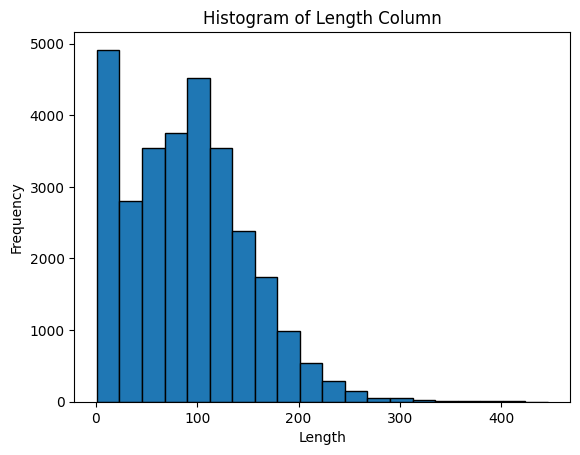

In [14]:
for df in listOfDataframes:
  df['Length'] = df['ASCII Representation'].apply(len)
  print(df['Length'].max())
  plt.hist(df['Length'], bins=20, edgecolor='black')
  plt.title('Histogram of Length Column')
  plt.xlabel('Length')
  plt.ylabel('Frequency')
  plt.show()
  print()

# Key Observation for Intelligence Age
The text corpus, although written in a conversational style which has a certain informal words, it still has a mixture of the most common sentence structures in English.

In [15]:
#maxLen = sentencesDf['Length'].max()
#dfPCA = pd.DataFrame(sentencesDf['numericalRep'].tolist(), columns=[f'd{i+1}' for i in range(maxLen)])
#dfPCA.fillna(0, inplace=True)
#dfPCA.head()

In [15]:
listOfDfPCAs = []

for i, df in enumerate(listOfDataframes):
    # Find the maximum length of ASCII representation in this DataFrame
    maxLen = df['Length'].max()

    # Convert each 'ASCII Representation' to a list for DataFrame creation
    # Here, we assume 'ASCII Representation' is the column name for ASCII codes
    dfPCA = pd.DataFrame(df['ASCII Representation'].tolist(), columns=[f'd{j+1}' for j in range(maxLen)])

    # Fill NaN with 0 since padding hasn't been done yet
    dfPCA.fillna(0, inplace=True)

    # Optionally rename the DataFrame for clarity - this doesn't affect list storage
    dfPCA.name = f'dfPCA_{i}'

    # Append this PCA DataFrame to our list
    listOfDfPCAs.append(dfPCA)

    # Print the head of this PCA DataFrame for verification
    print(f"Head of {dfPCA.name}:")
    print(dfPCA.head())
    print(dfPCA.shape)
    print()

# Now, listOfDfPCAs contains all your PCA DataFrames
print(f"Number of PCA DataFrames created: {len(listOfDfPCAs)}")

Head of dfPCA_0:
   d1    d2     d3     d4     d5     d6     d7     d8     d9    d10  ...  \
0  10  10.0   32.0   32.0   32.0   32.0   32.0   32.0   78.0  101.0  ...   
1  10  32.0   32.0   32.0   32.0   32.0   32.0   32.0   32.0   32.0  ...   
2  32  77.0  111.0  115.0  116.0   32.0   72.0  111.0  108.0  111.0  ...   
3  32  87.0  105.0  116.0  104.0   32.0  101.0  118.0  101.0  114.0  ...   
4  32  83.0  111.0   32.0  109.0  117.0  115.0  101.0  117.0  109.0  ...   

   d316  d317  d318  d319  d320  d321  d322  d323  d324  d325  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 325 columns]
(54, 325)

Head of dfPCA_1:
   d1   d2   d3   d4   d5   d6   d7   d8   d9  d10  ...  d390  d391  d392  \
0  73  110   

### Sorting by number of sentences

In [16]:
listOfDfPCAs = sorted(listOfDfPCAs, key=lambda df: df.shape[0])
for dfPCA in listOfDfPCAs:
  print(dfPCA.shape)

(43, 399)
(50, 294)
(54, 325)
(60, 334)
(96, 415)
(1007, 176)
(1402, 396)
(1411, 394)
(11197, 446)
(14010, 446)
(29326, 446)


# PCA Trick
### For a compressed repsentation of ASCII values of each sentence.  

(43, 399)


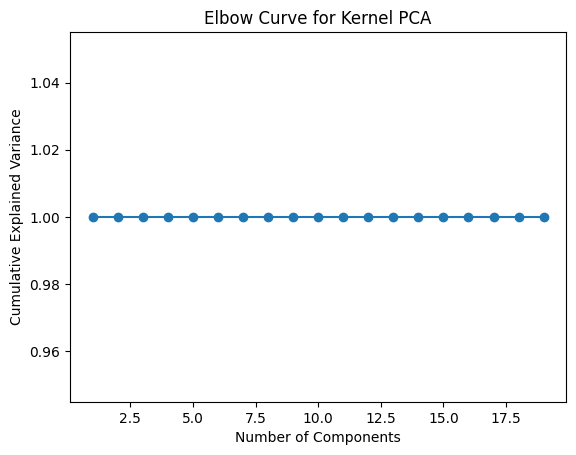

(50, 294)


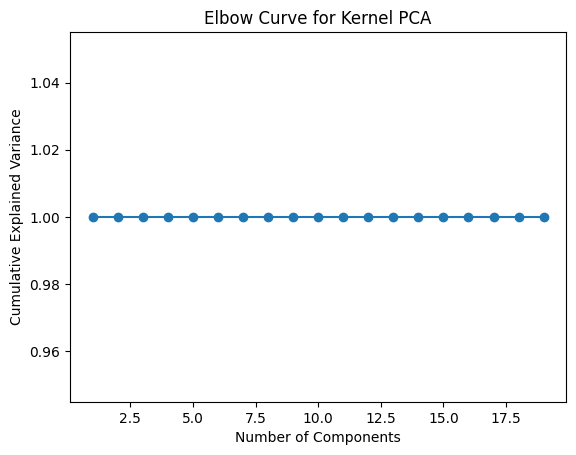

(54, 325)


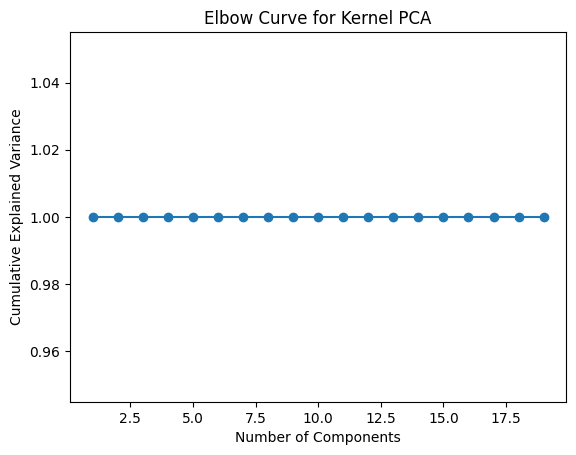

(60, 334)


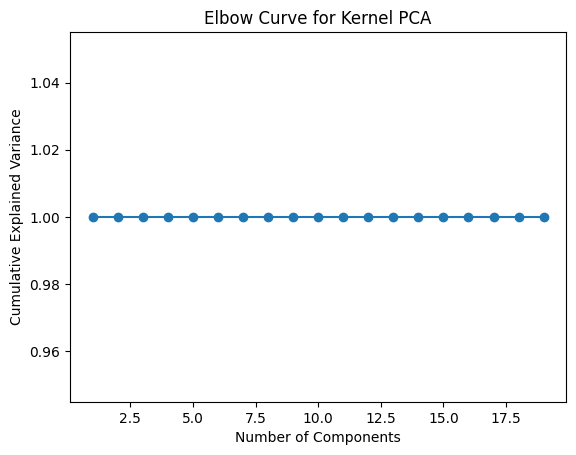

(96, 415)


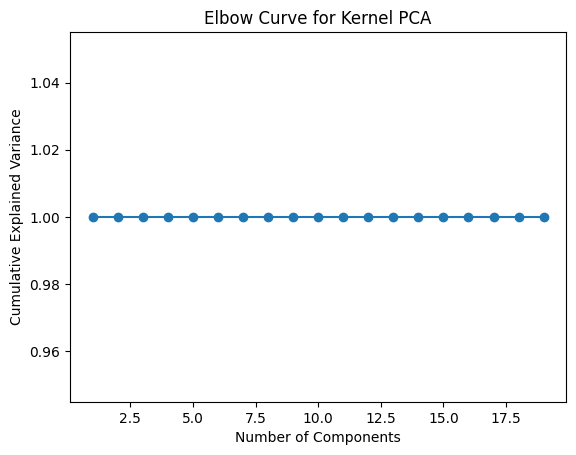

(1007, 176)


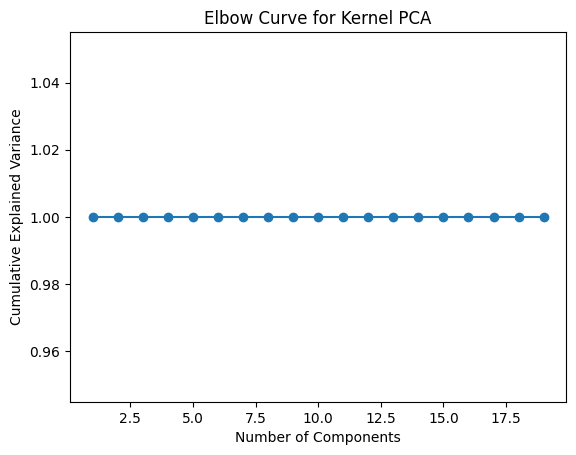

(1402, 396)


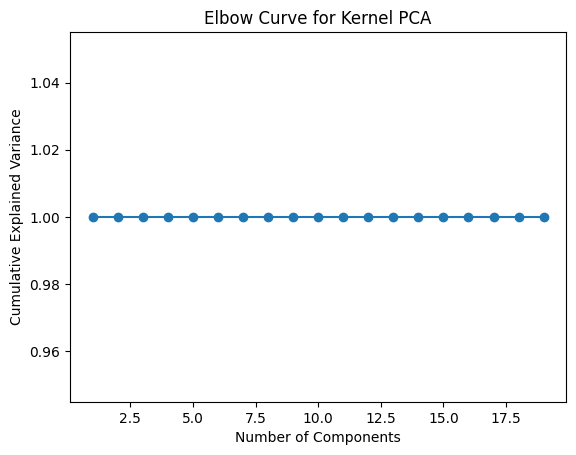

(1411, 394)


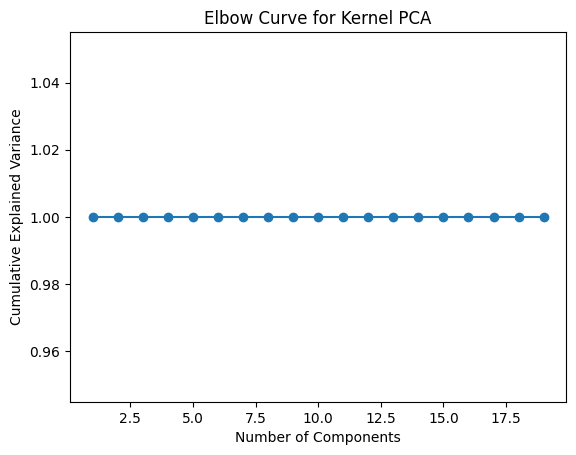

(11197, 446)


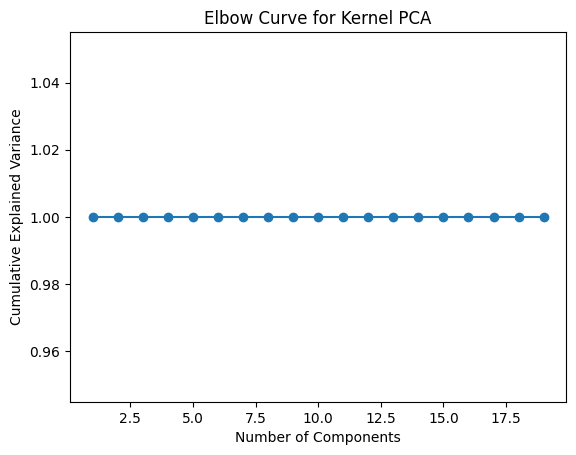

(14010, 446)


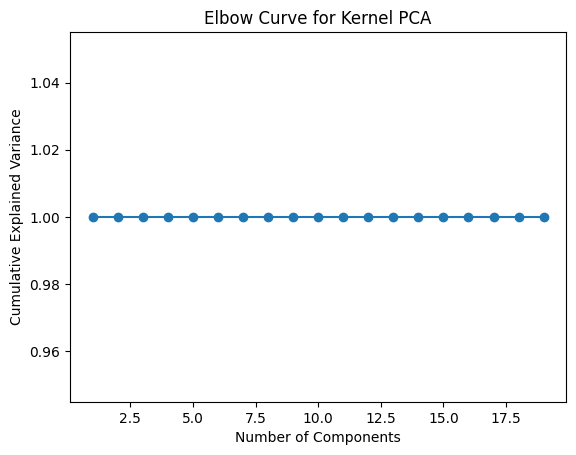

(29326, 446)


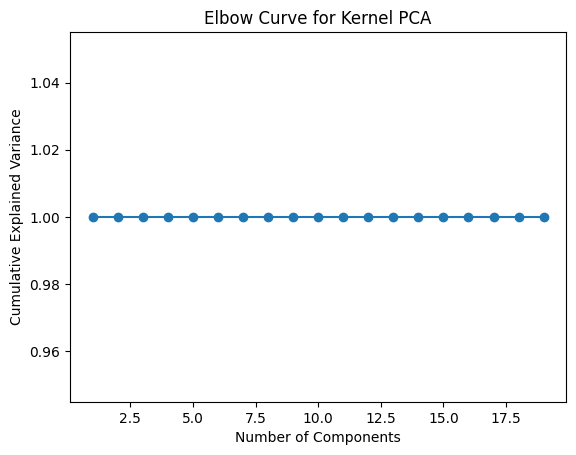

In [18]:
for dfPCA in listOfDfPCAs:
  X = dfPCA.values
  print(X.shape)
  X_scaled = normalize(X, axis=1, norm='l2')
  explained_variances = []
  n_components_range = range(1, 20)

  for n_components in n_components_range:
    kpca = KernelPCA(n_components=n_components, kernel='cosine', random_state=33)
    X_kpca = kpca.fit_transform(X_scaled)
    explained_variance = np.var(X_kpca, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)
    explained_variances.append(np.sum(explained_variance_ratio))

  plt.plot(n_components_range, explained_variances, marker='o')
  plt.xlabel('Number of Components')
  plt.ylabel('Cumulative Explained Variance')
  plt.title('Elbow Curve for Kernel PCA')
  plt.show()

In [19]:
for dfPCA in listOfDfPCAs:
  X = dfPCA.values
  print(X.shape)
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  kpca_1 = KernelPCA(n_components=1, kernel='cosine', random_state=33)
  X_kpca_1 = kpca_1.fit_transform(X_scaled)
  dfPCA['compressedNR_1'] = X_kpca_1
  print(dfPCA.head())
  print()

(43, 399)
   d1   d2   d3   d4   d5   d6   d7   d8   d9  d10  ...  d391  d392  d393  \
0  73  110   32  116  104  101   32  110  101  120  ...   0.0   0.0   0.0   
1  32   84  104  105  115   32  112  104  101  110  ...   0.0   0.0   0.0   
2  32   80  101  111  112  108  101   32  104   97  ...   0.0   0.0   0.0   
3  32   87  101   32   97  114  101   32  109  111  ...   0.0   0.0   0.0   
4  32   79  117  114   32  103  114   97  110  100  ...   0.0   0.0   0.0   

   d394  d395  d396  d397  d398  d399  compressedNR_1  
0   0.0   0.0   0.0   0.0   0.0   0.0       -0.321529  
1   0.0   0.0   0.0   0.0   0.0   0.0       -0.522465  
2   0.0   0.0   0.0   0.0   0.0   0.0        0.255206  
3   0.0   0.0   0.0   0.0   0.0   0.0        0.585140  
4   0.0   0.0   0.0   0.0   0.0   0.0       -0.473071  

[5 rows x 400 columns]

(50, 294)
   d1   d2   d3   d4   d5   d6   d7   d8   d9  d10  ...  d286  d287  d288  \
0  65  115   32  108   97  116  101   32   97  115  ...   0.0   0.0   0.0   
1 

In [20]:
all_data_to_one = pd.concat([df['compressedNR_1'] for df in listOfDfPCAs], ignore_index=True)
all_data_to_one.shape

(58656,)

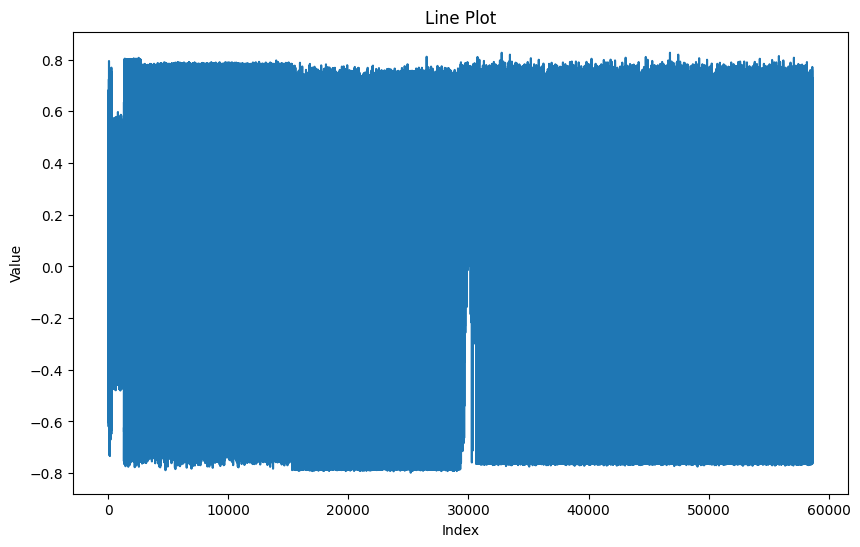

In [21]:
oneArray = all_data_to_one.to_numpy()
xAxis = np.arange(oneArray.shape[0])

plt.figure(figsize=(10, 6))
plt.plot(xAxis, oneArray)
plt.title('Line Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [22]:
for dfPCA in listOfDfPCAs:
  X = dfPCA.values
  print(X.shape)
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  kpca_17 = KernelPCA(n_components=17, kernel='cosine', random_state=33)
  X_kpca_17 = kpca_17.fit_transform(X_scaled)
  dfPCA['compressedNR_17'] = list(X_kpca_17)
  print(dfPCA.head())
  print()

(43, 400)
   d1   d2   d3   d4   d5   d6   d7   d8   d9  d10  ...  d392  d393  d394  \
0  73  110   32  116  104  101   32  110  101  120  ...   0.0   0.0   0.0   
1  32   84  104  105  115   32  112  104  101  110  ...   0.0   0.0   0.0   
2  32   80  101  111  112  108  101   32  104   97  ...   0.0   0.0   0.0   
3  32   87  101   32   97  114  101   32  109  111  ...   0.0   0.0   0.0   
4  32   79  117  114   32  103  114   97  110  100  ...   0.0   0.0   0.0   

   d395  d396  d397  d398  d399  compressedNR_1  \
0   0.0   0.0   0.0   0.0   0.0       -0.321529   
1   0.0   0.0   0.0   0.0   0.0       -0.522465   
2   0.0   0.0   0.0   0.0   0.0        0.255206   
3   0.0   0.0   0.0   0.0   0.0        0.585140   
4   0.0   0.0   0.0   0.0   0.0       -0.473071   

                                     compressedNR_17  
0  [-0.3246541979688815, -0.1828929838219359, 0.2...  
1  [-0.5245290667343792, 0.4547476227473154, -0.2...  
2  [0.2613989287505262, -0.36042592906776333, -0....  


In [23]:
all_data_to_seventeen = pd.concat([df['compressedNR_17'] for df in listOfDfPCAs], ignore_index=True)
all_data_to_seventeen.shape

(58656,)

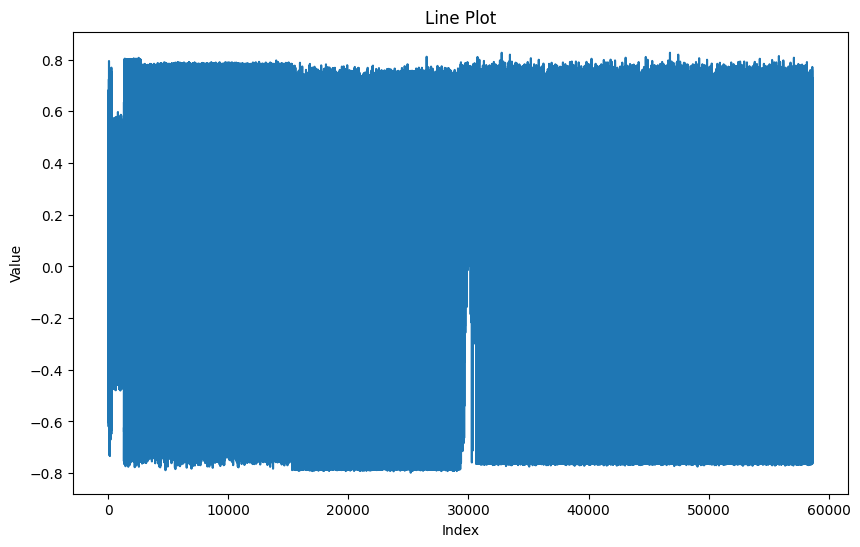

In [24]:
seventeenArray = all_data_to_one.to_numpy()
xAxis = np.arange(seventeenArray.shape[0])
plt.figure(figsize=(10, 6))
plt.plot(xAxis, seventeenArray)
plt.title('Line Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

# ASCII codes for Lexical Cateogries

In [25]:
avolc = pd.read_csv('/Users/sv.xxt/localDocuments/sem2/ds680/reducedASCIIofLexCats.csv')
# aciivaluesoflexicalcategories
# Done on https://colab.research.google.com/drive/1iPlRMQIlAQRaEp01iDamGv0oWNfcSJeD?usp=share_link
# using Oxford's API
print(avolc.shape)
avolc.head()

(17, 3)


,lexCat,lexASCII,reducedASCII
0,Abbreviation,"[65, 98, 98, 114, 101, 118, 105, 97, 116, 105,...",0.715901
1,Adjective,"[65, 100, 106, 101, 99, 116, 105, 118, 101]",0.286725
2,Adposition,"[65, 100, 112, 111, 115, 105, 116, 105, 111, 110]",0.664445
3,Adverb,"[65, 100, 118, 101, 114, 98]",-0.592642
4,Affix,"[65, 102, 102, 105, 120]",-0.593880


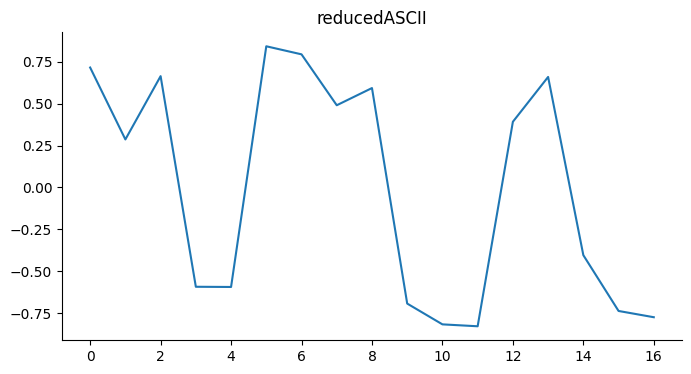

In [26]:
# @title reducedASCII

from matplotlib import pyplot as plt
avolc['reducedASCII'].plot(kind='line', figsize=(8, 4), title='reducedASCII')
plt.gca().spines[['top', 'right']].set_visible(False)

In [27]:
lexCat = avolc['lexCat'].tolist()
print(lexCat)

['Abbreviation', 'Adjective', 'Adposition', 'Adverb', 'Affix', 'Conjunction', 'Contraction', 'Determiner', 'Interjection', 'Noun', 'Other', 'Phrase', 'Predeterminer', 'Preposition', 'Pronoun', 'Symbol', 'Verb']


In [28]:
#RA - reducedASCII
lexCatInRA = np.array(avolc['reducedASCII'].tolist())
print(lexCatInRA)

[ 0.71590091  0.2867249   0.66444542 -0.592642   -0.59387992  0.84275472
  0.79462763  0.49076816  0.59344712 -0.69295269 -0.81704743 -0.82846908
  0.39217374  0.659702   -0.40400667 -0.73709869 -0.77444813]


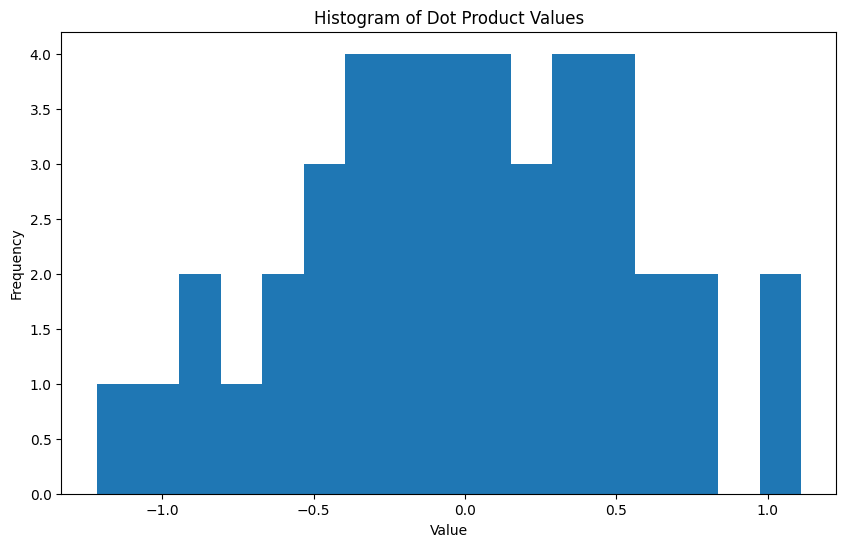

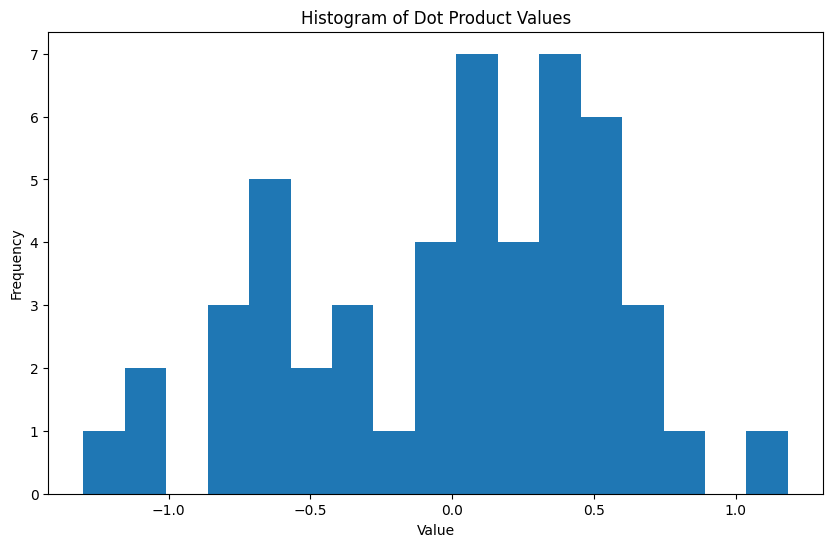

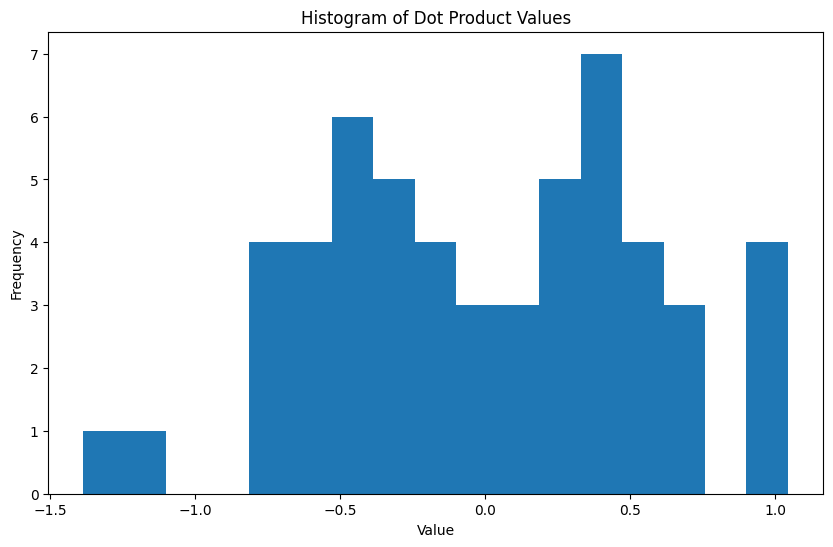

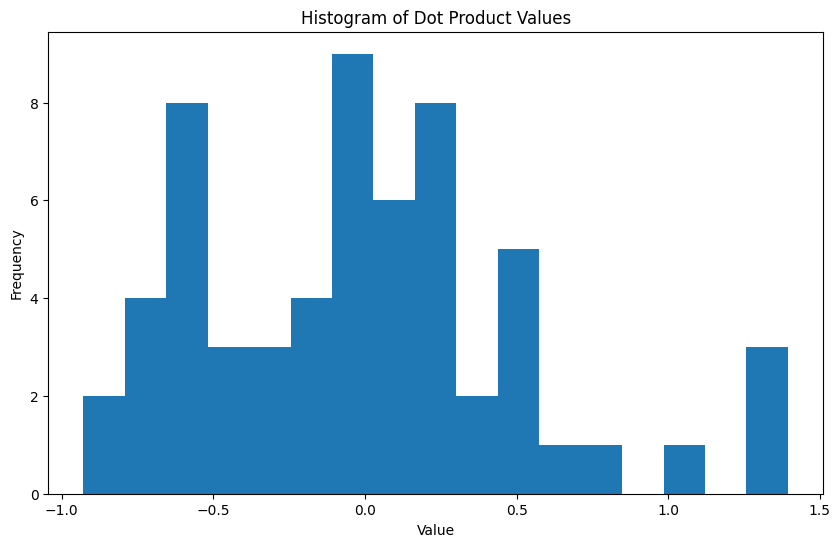

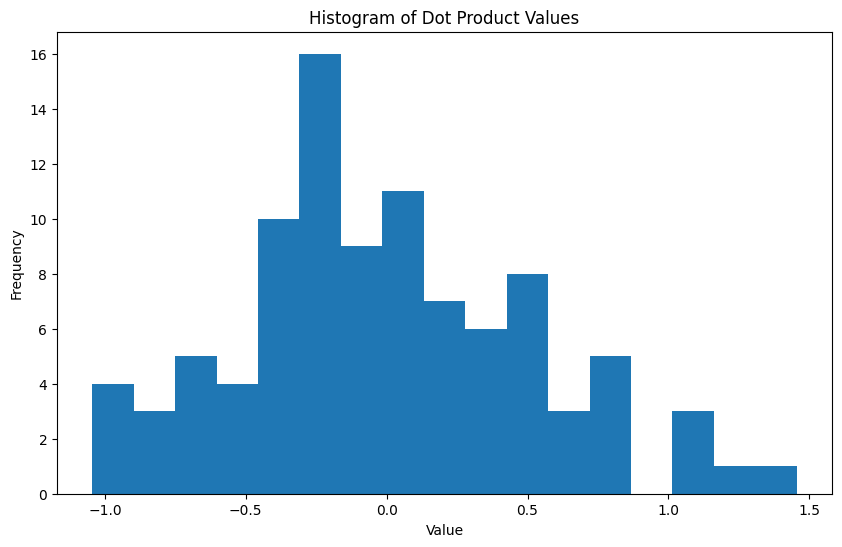

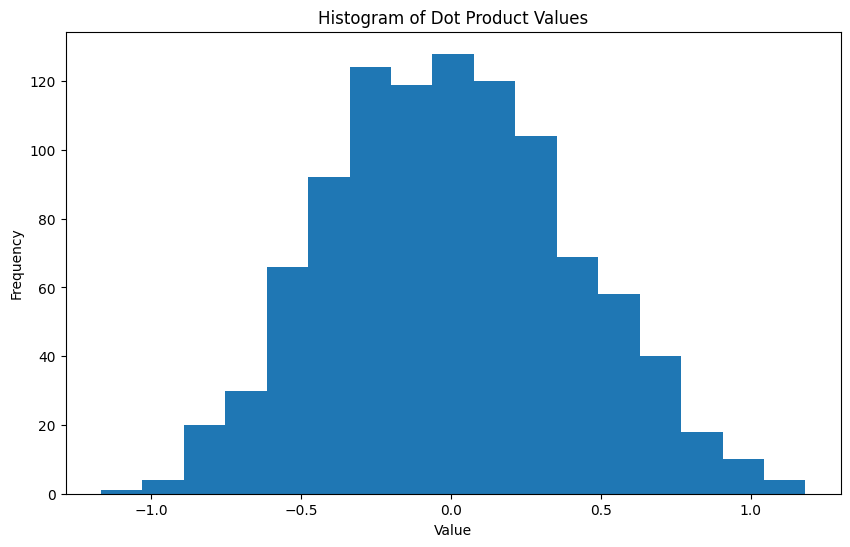

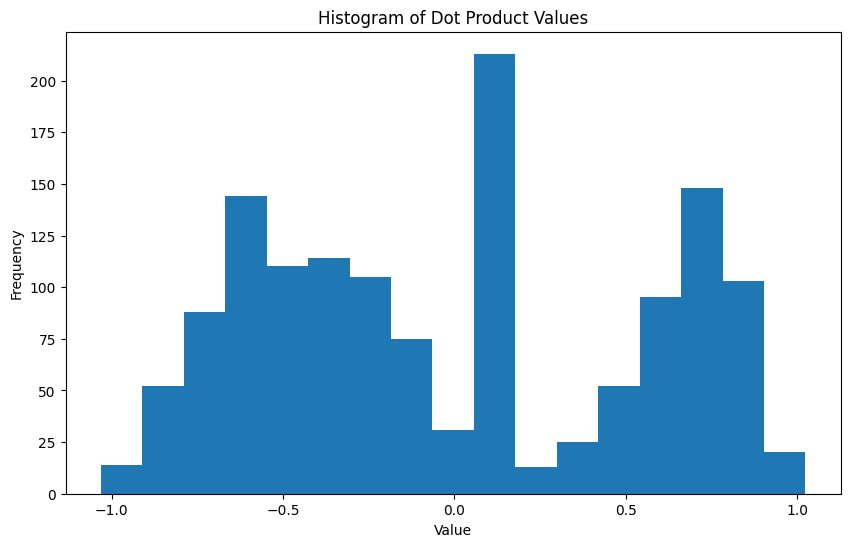

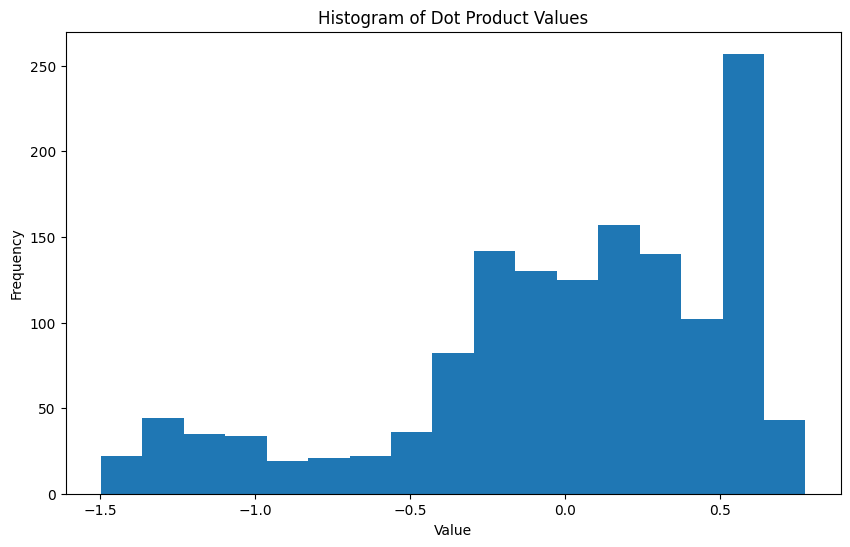

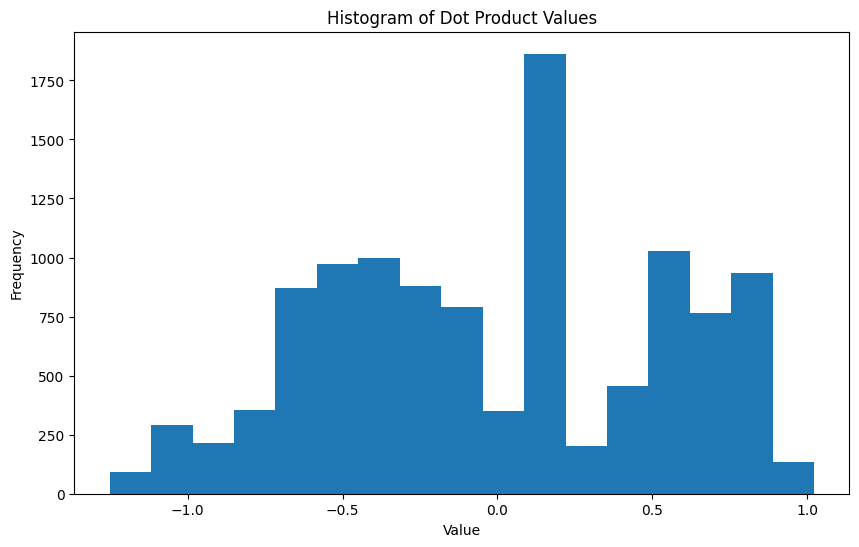

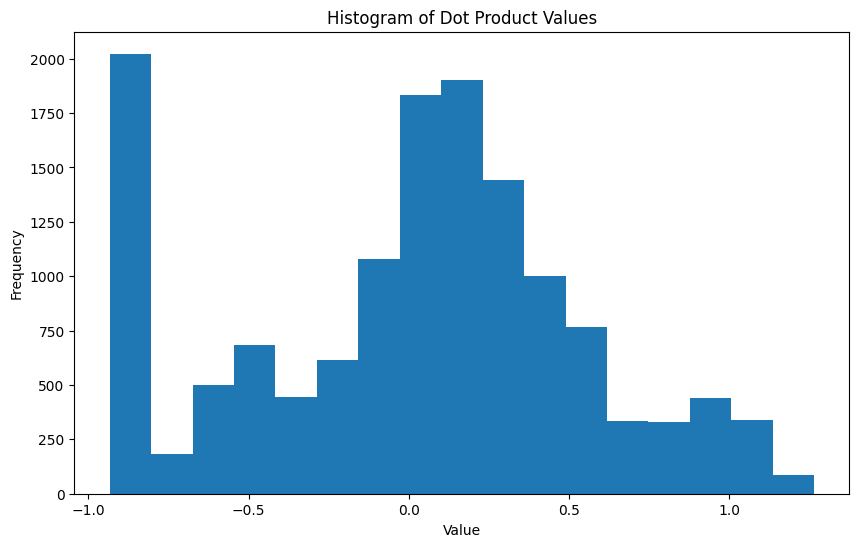

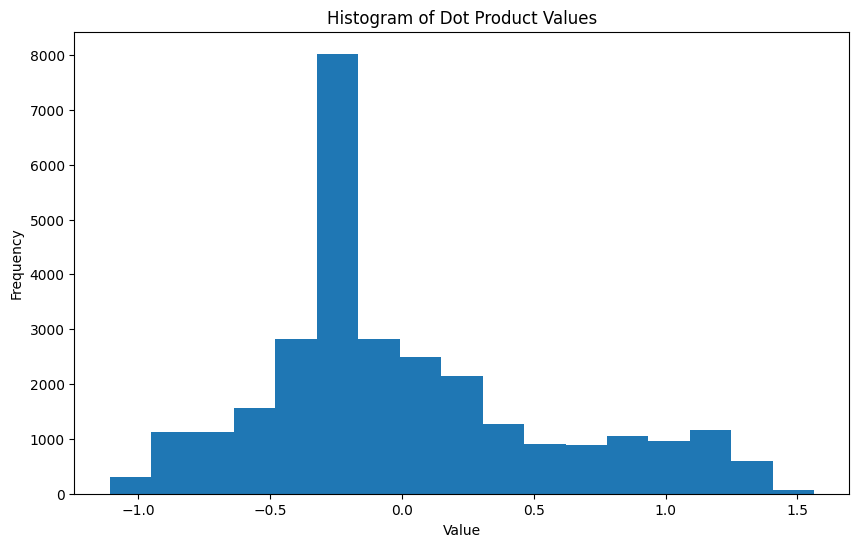

In [29]:
for i, dfPCA in enumerate(listOfDfPCAs):
  dfPCA['dotProduct'] = dfPCA['compressedNR_17'].apply(lambda x: np.dot(x, lexCatInRA))
  plt.figure(figsize=(10, 6))
  plt.hist(dfPCA['dotProduct'], bins=17)
  plt.title('Histogram of Dot Product Values')
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()
  print()

In [30]:
listOfDfPCAs[0].head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d393,d394,d395,d396,d397,d398,d399,compressedNR_1,compressedNR_17,dotProduct
0,73,110,32,116,104,101,32,110,101,120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.321529,"[-0.3246541979688815, -0.1828929838219359, 0.2...",-0.520162
1,32,84,104,105,115,32,112,104,101,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.522465,"[-0.5245290667343792, 0.4547476227473154, -0.2...",-0.792539
2,32,80,101,111,112,108,101,32,104,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.255206,"[0.2613989287505262, -0.36042592906776333, -0....",0.140595
3,32,87,101,32,97,114,101,32,109,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.585140,"[0.5849523298032085, 0.4786675466233377, 0.393...",0.586246
4,32,79,117,114,32,103,114,97,110,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.473071,"[-0.47628924412245405, 0.17894766898746747, -0...",0.418290


In [31]:
for dfPCA in listOfDfPCAs:
  maxDotProduct = dfPCA['dotProduct'].max()
  minDotProduct = dfPCA['dotProduct'].min()
  print(f"Max Dot Product: {maxDotProduct}")
  print(f"Min Dot Product: {minDotProduct}")
  print()  

Max Dot Product: 1.1099402974130084
Min Dot Product: -1.2166193003183412

Max Dot Product: 1.1847766322756788
Min Dot Product: -1.3011242377614511

Max Dot Product: 1.0439218405237838
Min Dot Product: -1.386194573303744

Max Dot Product: 1.3947878178932644
Min Dot Product: -0.928427029020966

Max Dot Product: 1.45549199453959
Min Dot Product: -1.0447841492758174

Max Dot Product: 1.1820477251502517
Min Dot Product: -1.1688233112816766

Max Dot Product: 1.0245169834145418
Min Dot Product: -1.0315557085070854

Max Dot Product: 0.7744985391303891
Min Dot Product: -1.4982564885168796

Max Dot Product: 1.0232127273385712
Min Dot Product: -1.2522055131545584

Max Dot Product: 1.2646093573961013
Min Dot Product: -0.933469286829366

Max Dot Product: 1.5638328366488277
Min Dot Product: -1.1084748063376586



In [32]:
# @title dotProduct

#from matplotlib import pyplot as plt
#sentencesDf['dotProduct'].plot(kind='line', figsize=(8, 4), title='dotProduct')
#plt.gca().spines[['top', 'right']].set_visible(False)

In [33]:
# @title compressedNR_1 vs dotProduct

#from matplotlib import pyplot as plt
#sentencesDf.plot(kind='scatter', x='compressedNR_1', y='dotProduct', s=32, alpha=.8)
#plt.gca().spines[['top', 'right',]].set_visible(False)

In [34]:
# @title dotProduct

#from matplotlib import pyplot as plt
#sentencesDf['dotProduct'].plot(kind='hist', bins=20, title='dotProduct')
#plt.gca().spines[['top', 'right',]].set_visible(False)

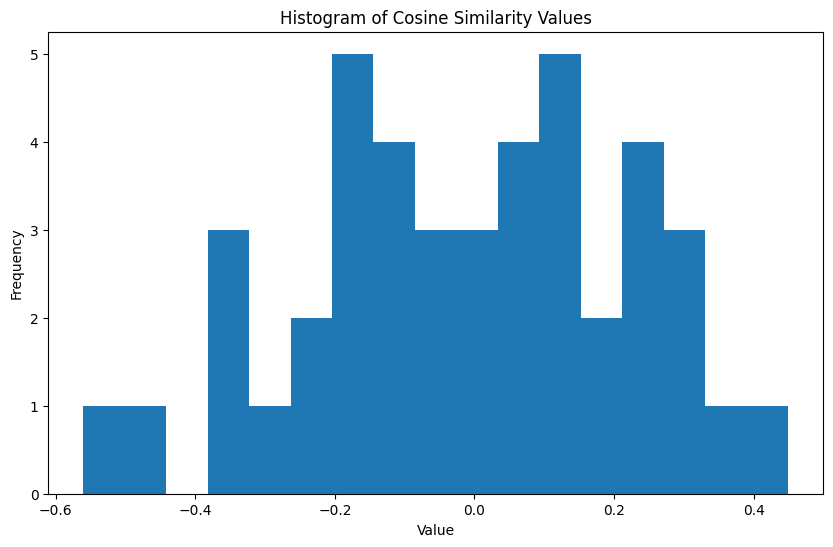

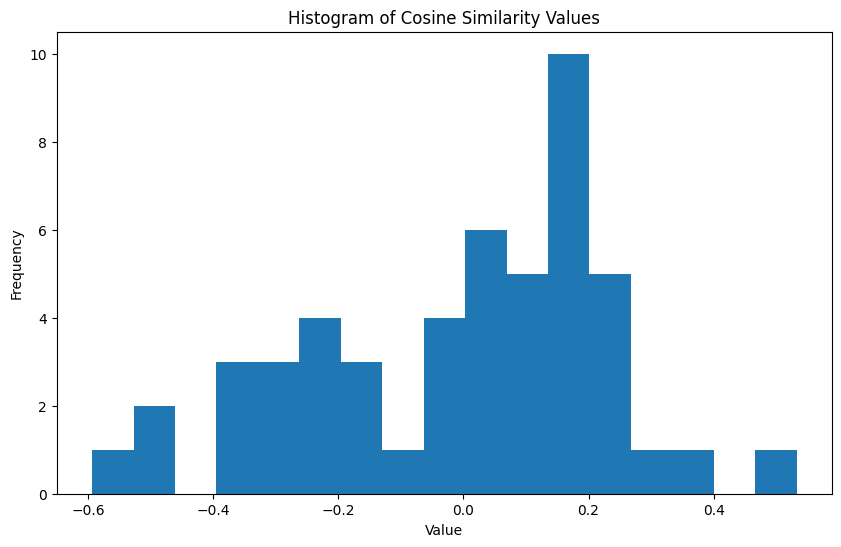

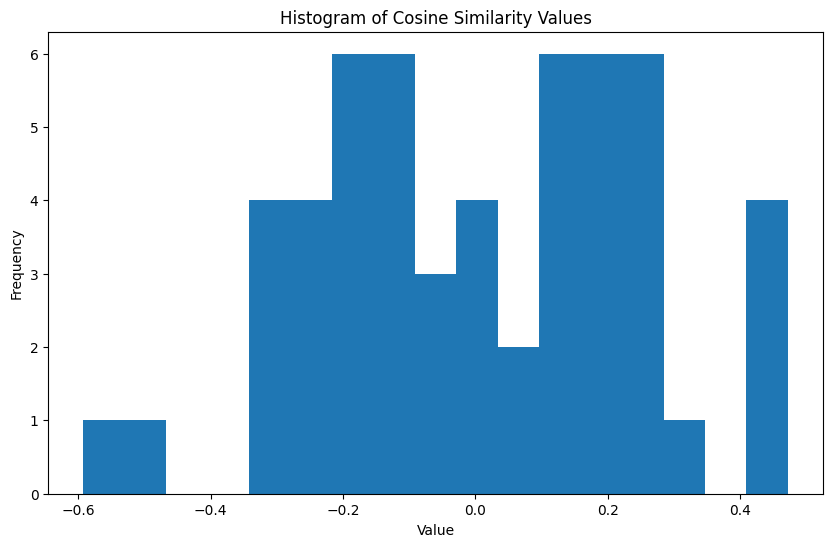

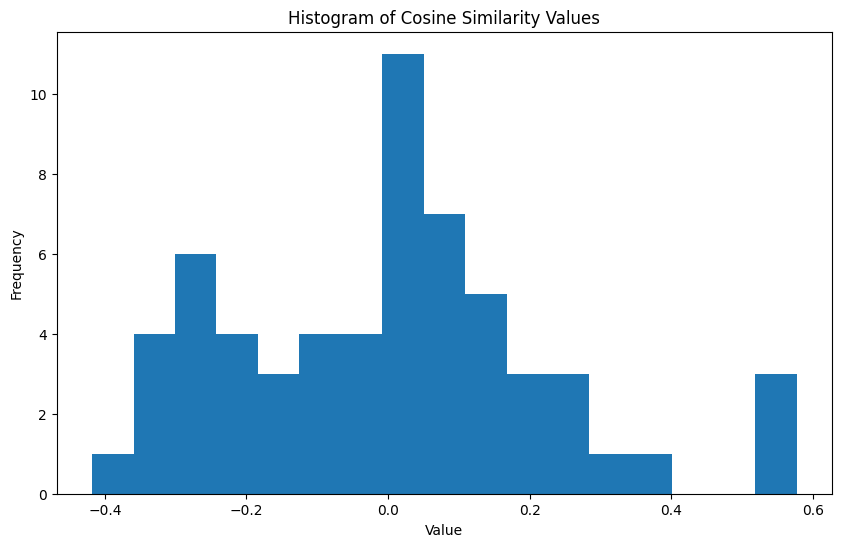

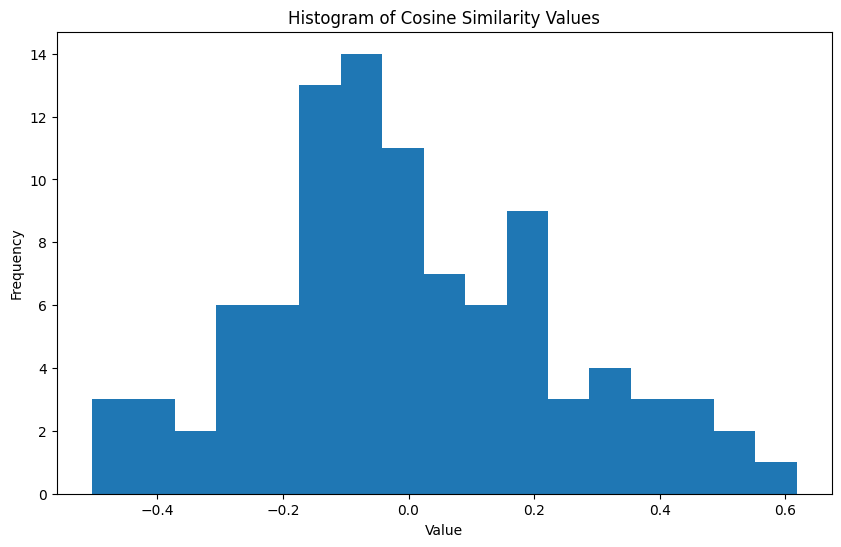

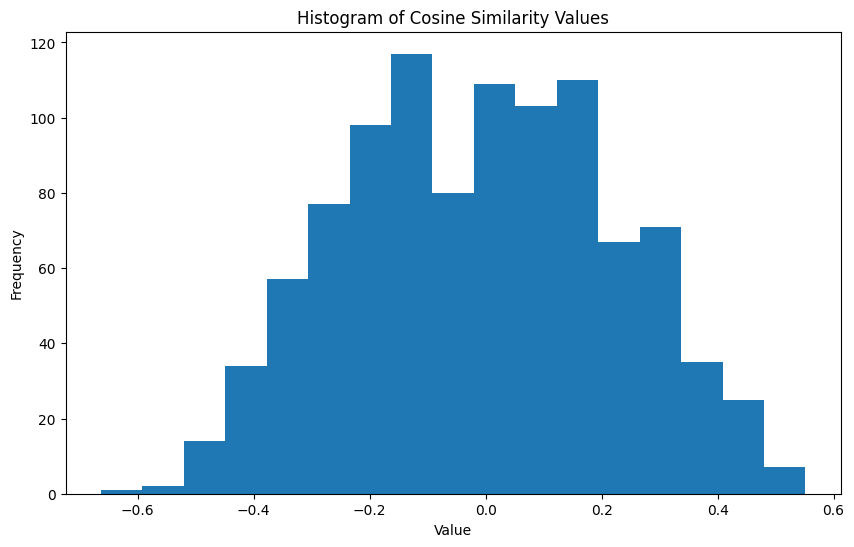

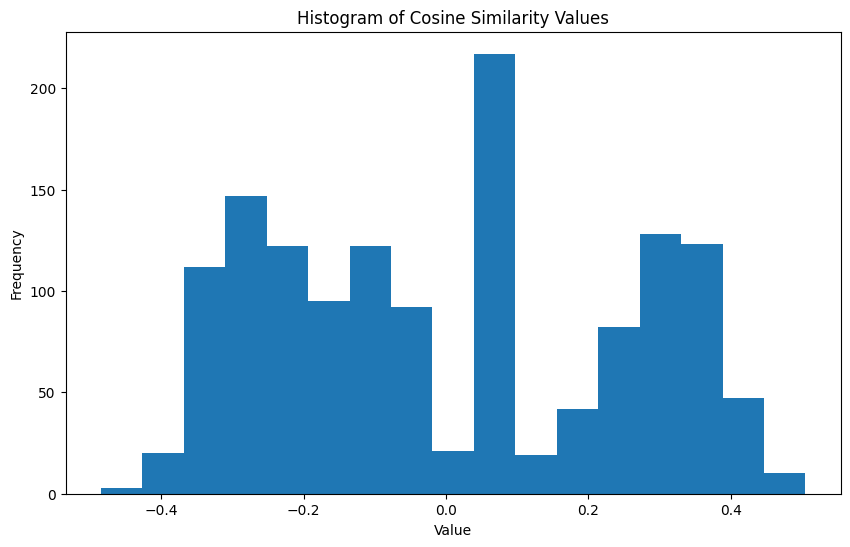

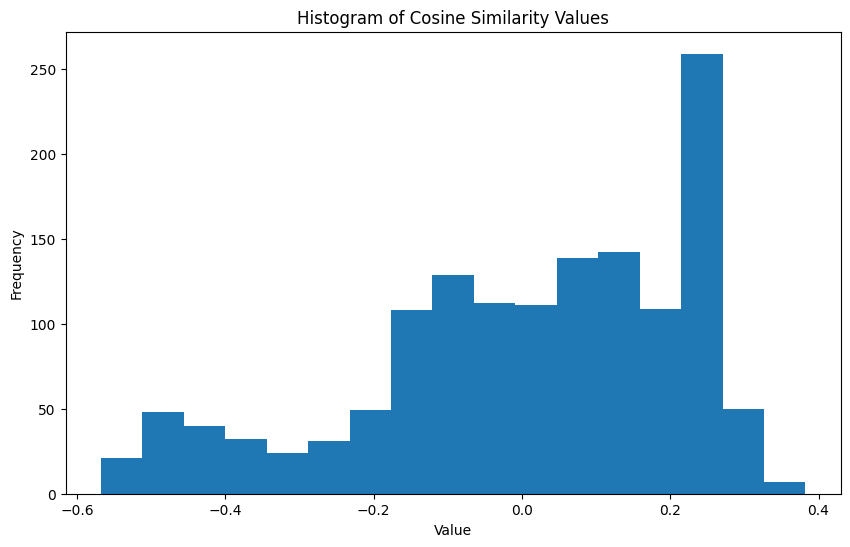

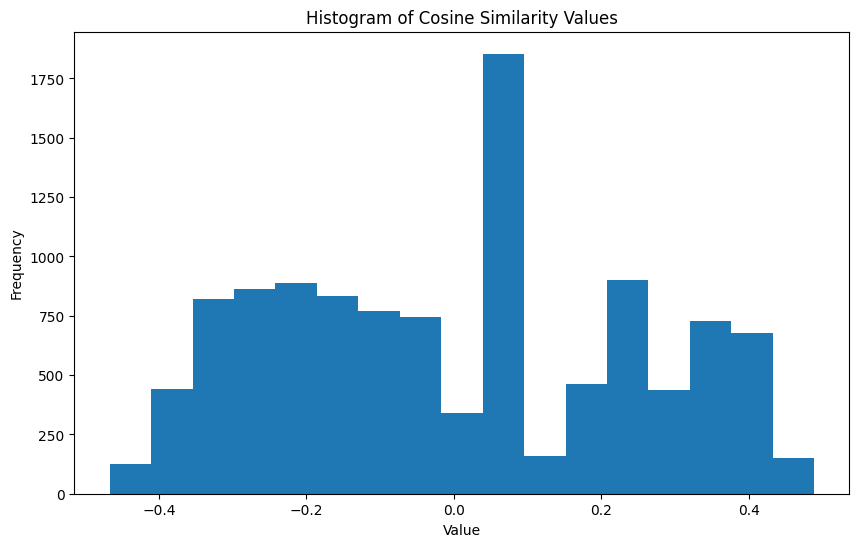

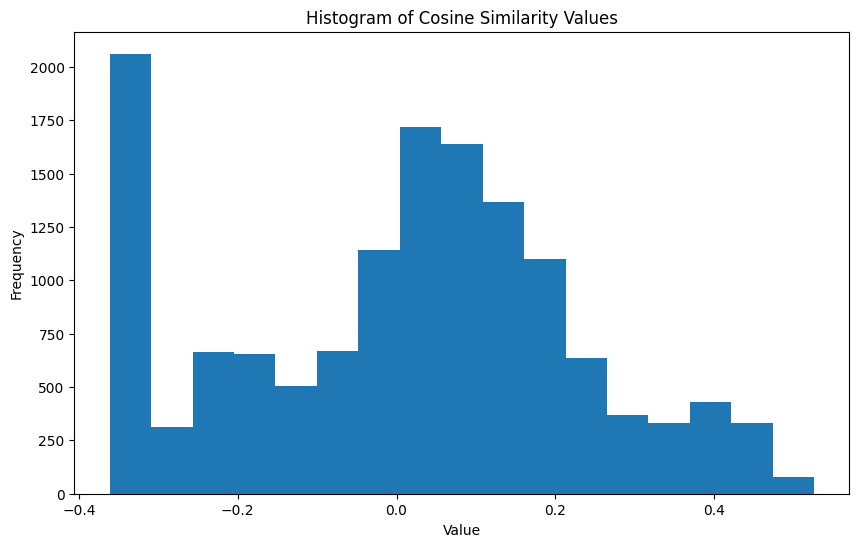

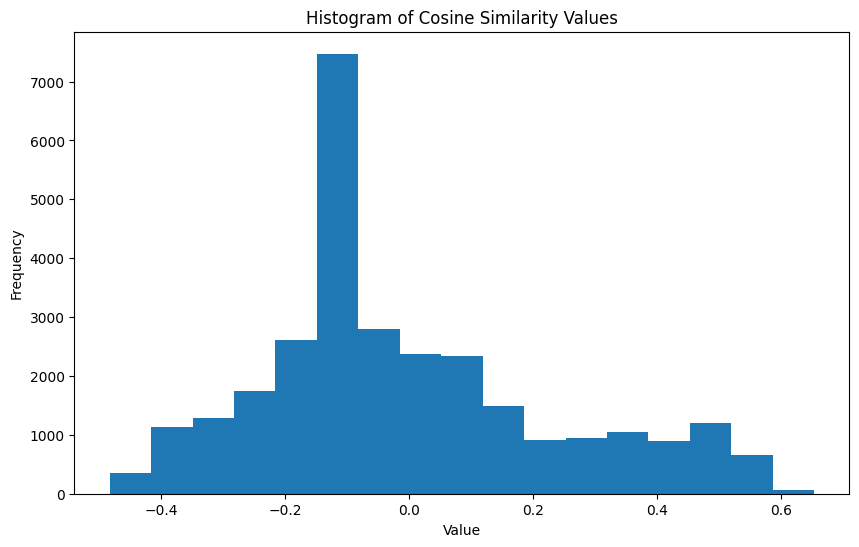

In [35]:
def cosineSimilarity(a, b):
  dot_product = np.dot(a, b)
  norm_a = np.linalg.norm(a)
  norm_b = np.linalg.norm(b)
  return dot_product / (norm_a * norm_b)

for dfPCA in listOfDfPCAs:
  dfPCA['cosineSimilarity'] = dfPCA['compressedNR_17'].apply(lambda x: cosineSimilarity(x, lexCatInRA))
  dfPCA.head()
  plt.figure(figsize=(10, 6))
  plt.hist(dfPCA['cosineSimilarity'], bins=17)
  plt.title('Histogram of Cosine Similarity Values')
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()

In [36]:
for dfPCA in listOfDfPCAs:
  maxCosineSimilarity = dfPCA['cosineSimilarity'].max()
  minCosineSimilarity = dfPCA['cosineSimilarity'].min()
  print(f"Max Cosine Similarity: {maxCosineSimilarity}")
  print(f"Min Cosine Similarity: {minCosineSimilarity}")
  print()

Max Cosine Similarity: 0.44911733915350355
Min Cosine Similarity: -0.5602566197230354

Max Cosine Similarity: 0.5326665971208362
Min Cosine Similarity: -0.5933834042698931

Max Cosine Similarity: 0.4722012049801374
Min Cosine Similarity: -0.5924693531106241

Max Cosine Similarity: 0.5773505887435721
Min Cosine Similarity: -0.4180216903486447

Max Cosine Similarity: 0.6184100473793851
Min Cosine Similarity: -0.5040869501220586

Max Cosine Similarity: 0.5514961561849515
Min Cosine Similarity: -0.6635028308667346

Max Cosine Similarity: 0.5047466176262525
Min Cosine Similarity: -0.4847470879089574

Max Cosine Similarity: 0.3823564214878758
Min Cosine Similarity: -0.5676508554803639

Max Cosine Similarity: 0.48895440114962035
Min Cosine Similarity: -0.4667236682427433

Max Cosine Similarity: 0.5258027192290775
Min Cosine Similarity: -0.36122370795252307

Max Cosine Similarity: 0.6527292760661121
Min Cosine Similarity: -0.4828027012493324



In [37]:
# @title dotProduct vs cosineSimilarity

#from matplotlib import pyplot as plt
#sentencesDf.plot(kind='scatter', x='dotProduct', y='cosineSimilarity', s=32, alpha=.8)
#plt.gca().spines[['top', 'right',]].set_visible(False)

In [38]:
# @title cosineSimilarity

#from matplotlib import pyplot as plt
#sentencesDf['cosineSimilarity'].plot(kind='hist', bins=20, title='cosineSimilarity')
#plt.gca().spines[['top', 'right',]].set_visible(False)

From Gemini :
Cosine similarity is generally a better choice because it focuses on the similarity of the directions of the vectors, rather than their magnitudes. This helps to capture the semantic similarity between sentences, regardless of their lengths or word frequencies.

[A recorded overview for Sam Atman's blog on Intelligence Age.](https://drive.google.com/file/d/1DaPZES-zfBWtITu0E_UYbK9BMHs1Qoyu/view?usp=share_link)

#### Normality Test


Combined Normality Test Results (Shapiro-Wilk and Anderson-Darling):
       Experiment  Sample_Size  Shapiro_Statistic  Shapiro_P_Value  \
0         Blog_ia           43           0.991321     9.839495e-01   
1        Guardian           50           0.964547     1.377997e-01   
2             Mus           54           0.977142     3.877458e-01   
3             NYT           60           0.953110     2.186191e-02   
4       Blog_Rref           96           0.979726     1.434586e-01   
5            Grok         1007           0.995795     7.514044e-03   
6    Reviews_test         1402           0.934546     2.469436e-24   
7     Reviews_val         1411           0.908294     2.526735e-28   
8   Reviews_train        11197           0.962414     9.564876e-47   
9     Reviews_all        14010           0.954351     5.003940e-54   
10       Combined        29326           0.931265     1.363591e-76   

   Shapiro_Normal  Anderson_Darling_Statistic  AD_Critical_Value_5%  \
0             Yes 

<Figure size 1200x800 with 0 Axes>

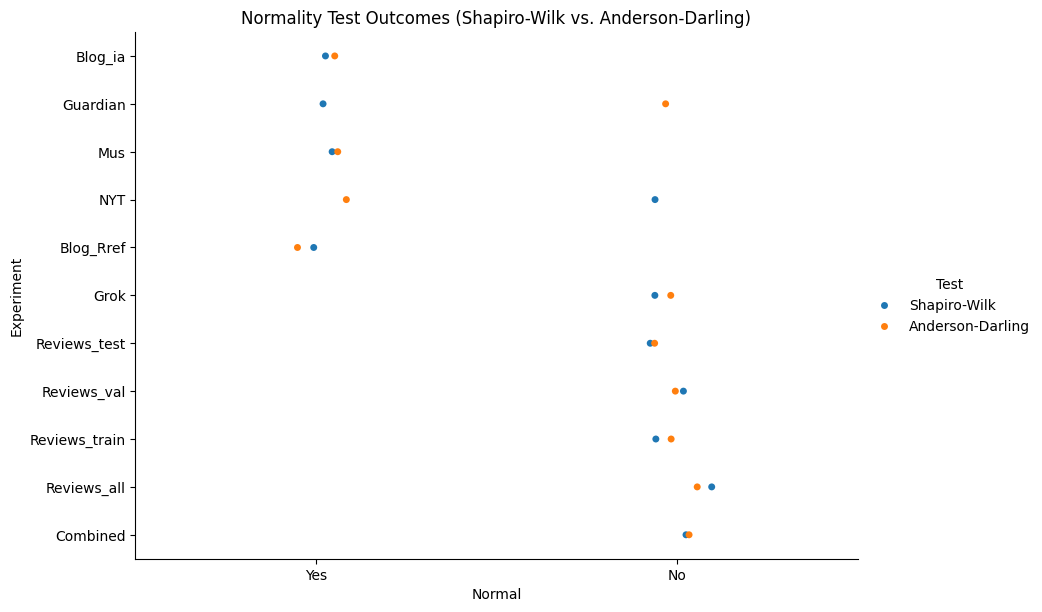

In [ ]:
from scipy.stats import anderson, shapiro

experiments = ['Blog_ia', 'Guardian', 'Mus', 'NYT', 'Blog_Rref', 'Grok','Reviews_test','Reviews_val','Reviews_train','Reviews_all','Combined']
results = []
for i, (df, exp_name) in enumerate(zip(listOfDfPCAs, experiments)):
    dot_products = df['dotProduct'].dropna()
    sample_size = len(dot_products)
    # Run Shapiro-Wilk test
    shapiro_stat, shapiro_p = shapiro(dot_products)
    shapiro_normal = 'Yes' if shapiro_p > 0.05 else 'No'
    
    # Run Anderson-Darling test
    ad_result = anderson(dot_products, dist='norm')
    ad_stat = ad_result.statistic
    # Anderson-Darling doesn't provide a p-value directly; compare statistic to critical values
    # Use 5% significance level (index 2 corresponds to 5% in critical_values)
    ad_critical_value = ad_result.critical_values[2]
    ad_normal = 'Yes' if ad_stat <= ad_critical_value else 'No'
    
    # Store results
    results.append({
        'Experiment': exp_name,
        'Sample_Size': sample_size,
        'Shapiro_Statistic': shapiro_stat,
        'Shapiro_P_Value': shapiro_p,
        'Shapiro_Normal': shapiro_normal,
        'Anderson_Darling_Statistic': ad_stat,
        'AD_Critical_Value_5%': ad_critical_value,
        'Anderson_Darling_Normal': ad_normal
    })


results_df = pd.DataFrame(results)

# Display results
print("\nCombined Normality Test Results (Shapiro-Wilk and Anderson-Darling):")
print(results_df)

# Save results to CSV
results_df.to_csv('normality_test_results.csv', index=False)

# Visualize normality outcomes
plt.figure(figsize=(12, 8))
# Melt the DataFrame to plot both Shapiro and Anderson-Darling normality results
melted_df = pd.melt(results_df, 
                    id_vars=['Experiment'], 
                    value_vars=['Shapiro_Normal', 'Anderson_Darling_Normal'],
                    var_name='Test', 
                    value_name='Normal')
melted_df['Test'] = melted_df['Test'].replace({
    'Shapiro_Normal': 'Shapiro-Wilk',
    'Anderson_Darling_Normal': 'Anderson-Darling'
})

# Plot
sns.catplot(data=melted_df, x='Normal', y='Experiment', hue='Test', kind='strip', height=6, aspect=1.5)
plt.title('Normality Test Outcomes (Shapiro-Wilk vs. Anderson-Darling)')
plt.savefig('normality_test_outcomes.png')
plt.show()